In [1]:
import scipy as sp 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os

In [48]:
PATH=r'/home/buzgalbraith/work/school/spring_2023/tone_evoked_data/'
def read_session_data(path):
    os.chdir(PATH+"/recording_sessions")
    return pd.read_excel('Recording sessions.xlsx')
def run_all(path):
    session_data=read_session_data(PATH)
    os.chdir(PATH+"/recordings/")
    control=[]
    test=[]
    for i in range(1,50):
        try:
            mat=sp.io.loadmat(str(i)+".mat")
            print("reading individual {0}".format(i))
            frequencies=mat["processedDATA"][0][0][3]
            amplitudes=mat["processedDATA"][0][0][4]
            lfp_data=mat["processedDATA"][0][0][10]
            peak, timestep_of_peak=get_highest_magnitude_relative_to_baseline(lfp_data,i,frequencies,amplitudes)
            if session_data["Strain"][i]=="WT":
                control.append([peak, timestep_of_peak])
            else:
                test.append([peak, timestep_of_peak])
            print("peak distance relative to baseline={0}, peak coloured at timestamp {1}".format(peak, timestep_of_peak))
        except:
           print("individual {0} not found".format(i))
    return control, test





calc_baseline=lambda trail_data: np.mean(trail_data[:2000])
calc_peak=lambda trail_data: np.min(trail_data[2000:])-calc_baseline(trail_data)
calc_peak_timestep=lambda trail_data: np.argmin(trail_data[2000:])+2000
def plot_single(lfp_data,f,a, ind_number,frequencies,amplitudes):
    plt.plot(np.mean(lfp_data[f][a],axis=1))
    f=frequencies[f][0]
    a=amplitudes[a][0]
    plt.title("individal:{2}, frequency:{0}, amplitude{1}".format(f,a,ind_number))
    plt.show()
def get_highest_magnitude_relative_to_baseline(lfp_data, ind_number,frequencies,amplitudes):
    deltas=np.zeros((lfp_data.shape[0],lfp_data.shape[1]))
    times_to_peak=np.zeros((lfp_data.shape[0],lfp_data.shape[1]))
    for i in range(lfp_data.shape[0]):
        for j in range(lfp_data.shape[1]):
            trail_data=np.mean(lfp_data[i][j],axis=1)
            deltas[i][j]=calc_peak(trail_data)
            times_to_peak[i][j]=calc_peak_timestep(trail_data)
    calc=np.argmin(deltas)
    f=calc//lfp_data.shape[1]
    a=calc-(lfp_data.shape[1]*f)
    plot_single(lfp_data,f,a, ind_number,frequencies,amplitudes)
    time_to_peak_opt=times_to_peak[f][a]
    return np.min(deltas),time_to_peak_opt



/home/buzgalbraith/miniconda3/envs/prob_stats_2/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


reading individual 1


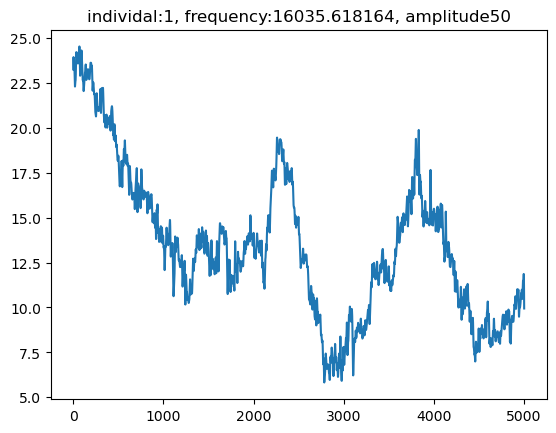

peak distance relative to baseline=-10.117367934364182, peak coloured at timestamp 2784.0
reading individual 2


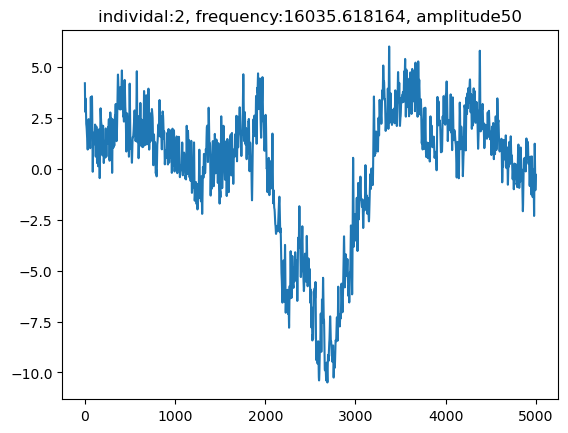

peak distance relative to baseline=-11.814782058103633, peak coloured at timestamp 2689.0
reading individual 3


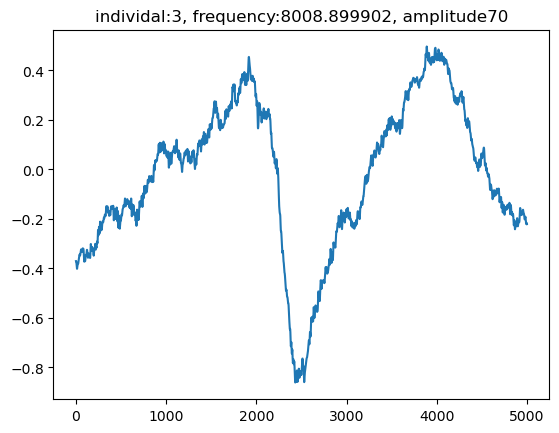

peak distance relative to baseline=-0.8671212744582848, peak coloured at timestamp 2431.0
individual 4 not found
individual 5 not found
reading individual 6


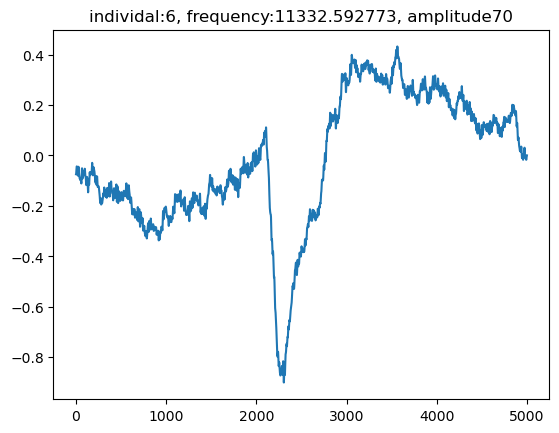

peak distance relative to baseline=-0.7370127159443702, peak coloured at timestamp 2304.0
reading individual 7


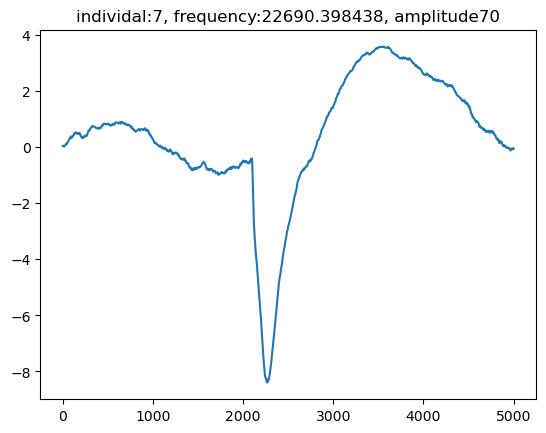

peak distance relative to baseline=-8.435037415691607, peak coloured at timestamp 2262.0
reading individual 8


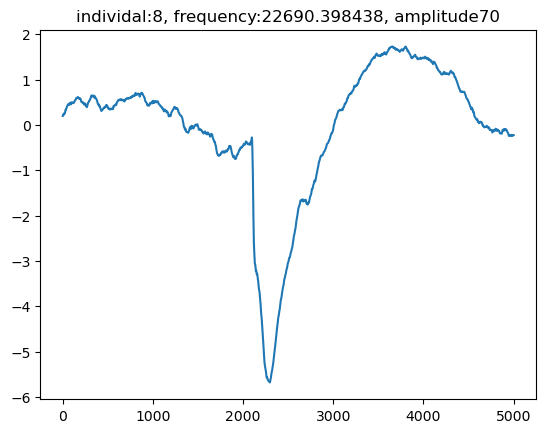

peak distance relative to baseline=-5.877432151392222, peak coloured at timestamp 2296.0
reading individual 9


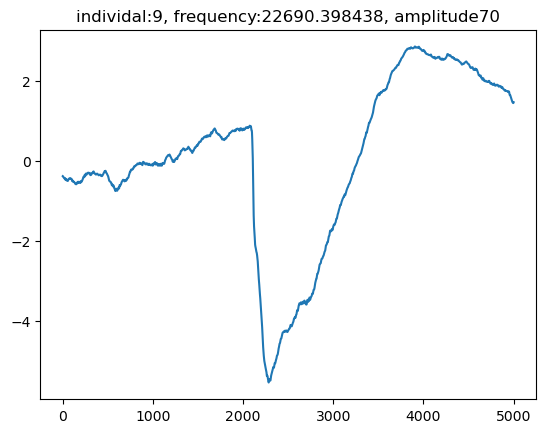

peak distance relative to baseline=-5.543861581135253, peak coloured at timestamp 2283.0
reading individual 10


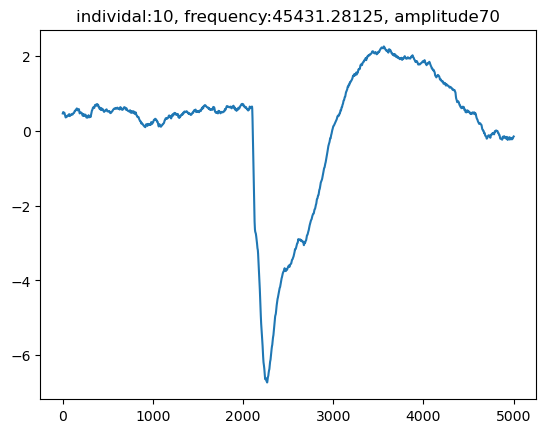

peak distance relative to baseline=-7.208327923505179, peak coloured at timestamp 2266.0
reading individual 11


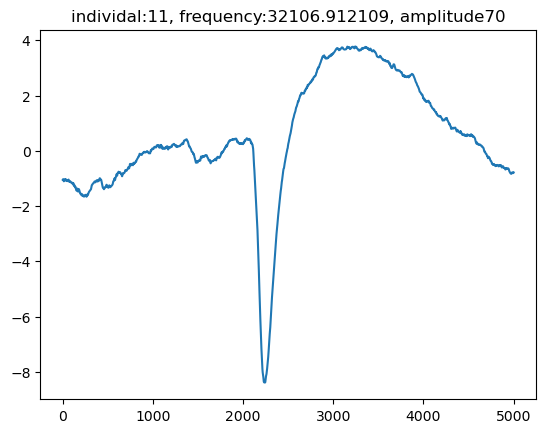

peak distance relative to baseline=-7.952704621590036, peak coloured at timestamp 2243.0
reading individual 12


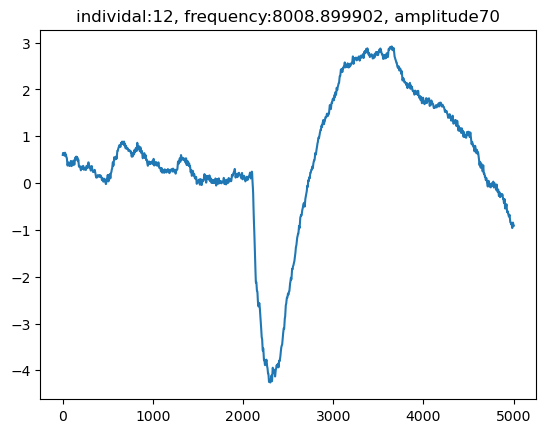

peak distance relative to baseline=-4.590651017750688, peak coloured at timestamp 2301.0
reading individual 13


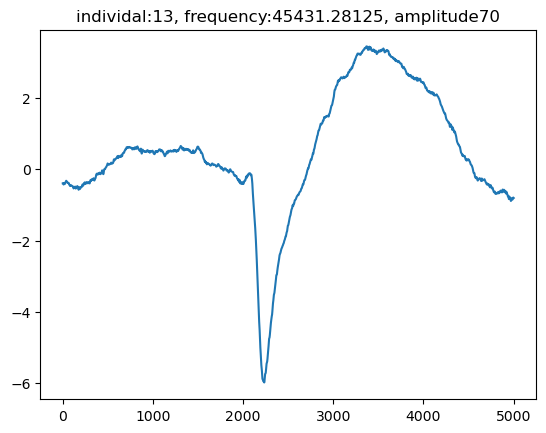

peak distance relative to baseline=-6.1463377816522184, peak coloured at timestamp 2234.0
reading individual 14


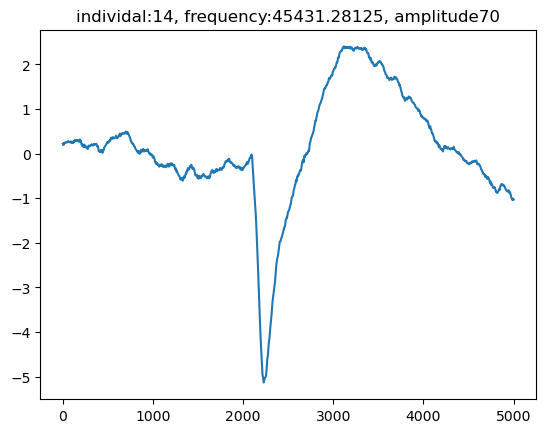

peak distance relative to baseline=-5.065247993494664, peak coloured at timestamp 2228.0
reading individual 15


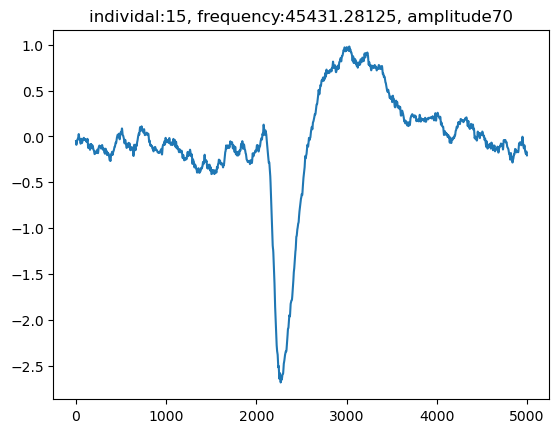

peak distance relative to baseline=-2.5309864568754517, peak coloured at timestamp 2269.0
reading individual 16


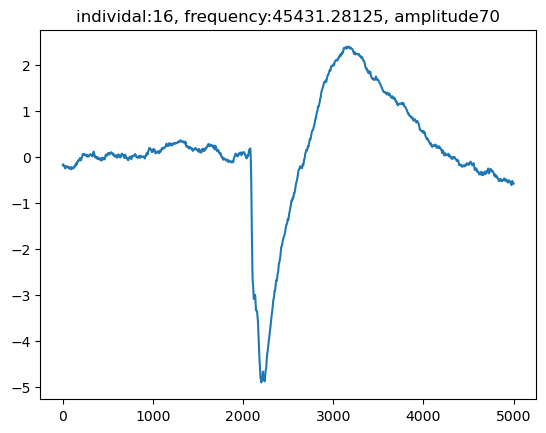

peak distance relative to baseline=-4.970464969478324, peak coloured at timestamp 2202.0
reading individual 17


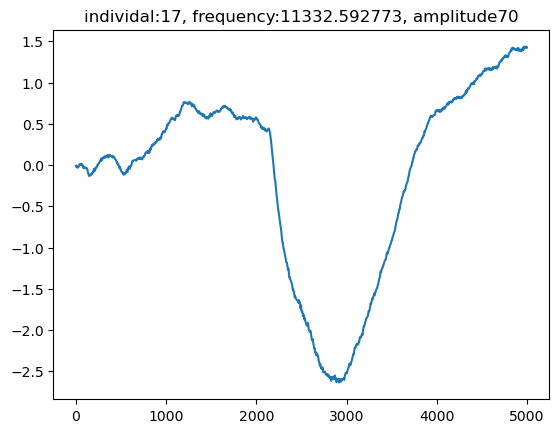

peak distance relative to baseline=-2.9842767677587623, peak coloured at timestamp 2917.0
reading individual 18


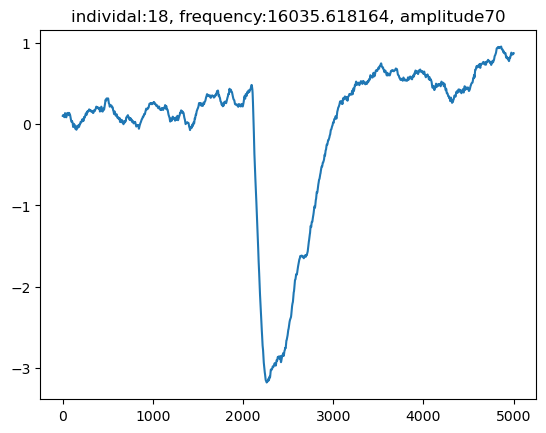

peak distance relative to baseline=-3.334724322285753, peak coloured at timestamp 2261.0
reading individual 19


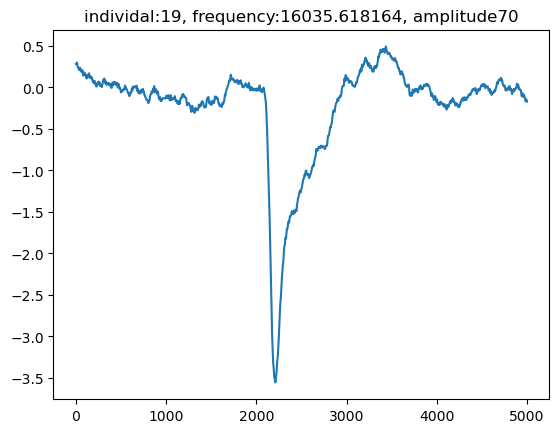

peak distance relative to baseline=-3.508349680455602, peak coloured at timestamp 2211.0
reading individual 20


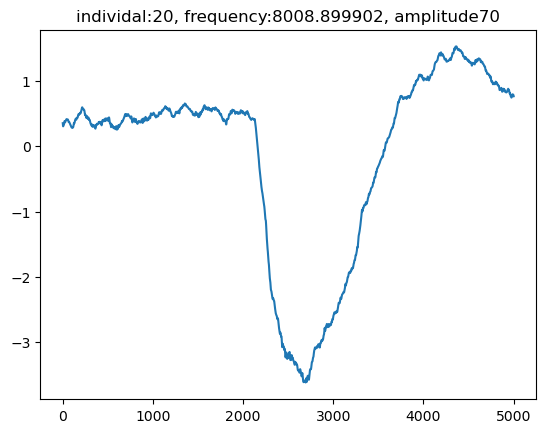

peak distance relative to baseline=-4.075107166933903, peak coloured at timestamp 2693.0
individual 21 not found
reading individual 22


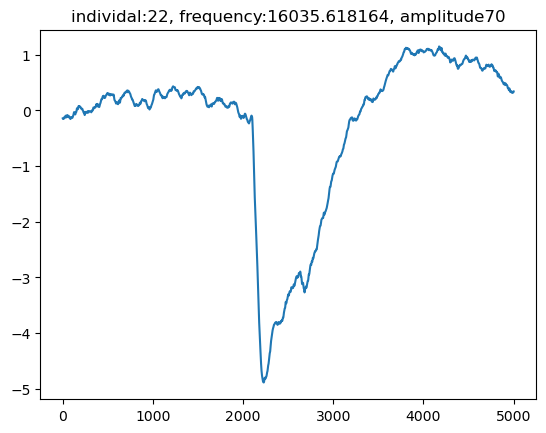

peak distance relative to baseline=-5.056460776430672, peak coloured at timestamp 2228.0
reading individual 23


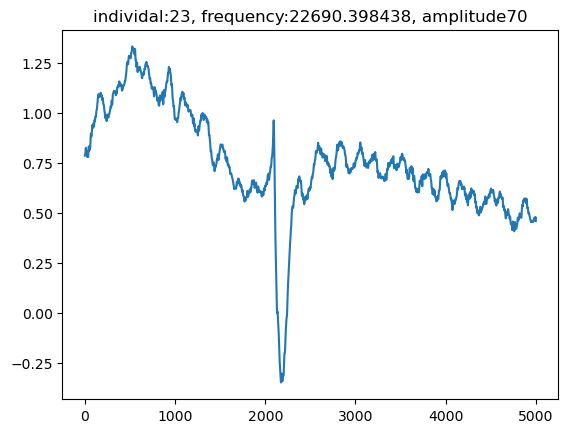

peak distance relative to baseline=-1.29705251207888, peak coloured at timestamp 2175.0
reading individual 24


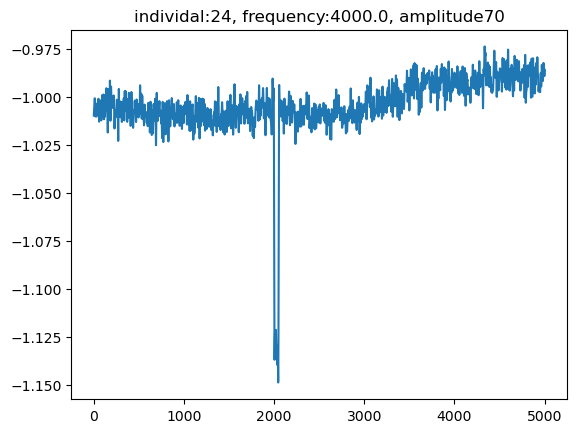

peak distance relative to baseline=-0.14058503355645047, peak coloured at timestamp 2045.0
reading individual 25


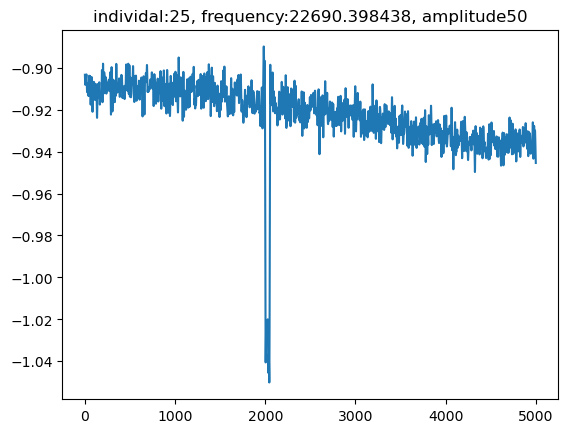

peak distance relative to baseline=-0.13880330203907398, peak coloured at timestamp 2044.0
reading individual 26


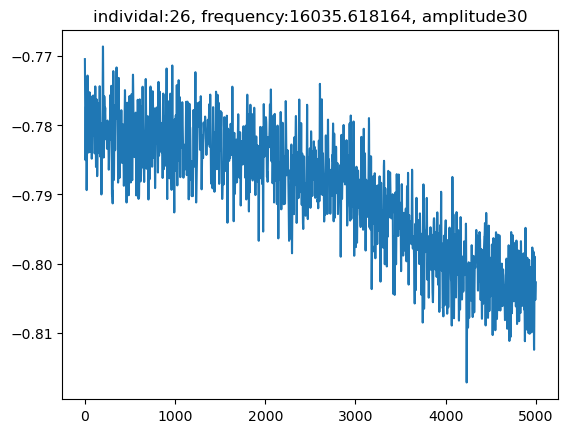

peak distance relative to baseline=-0.03488193683306928, peak coloured at timestamp 4233.0
reading individual 27


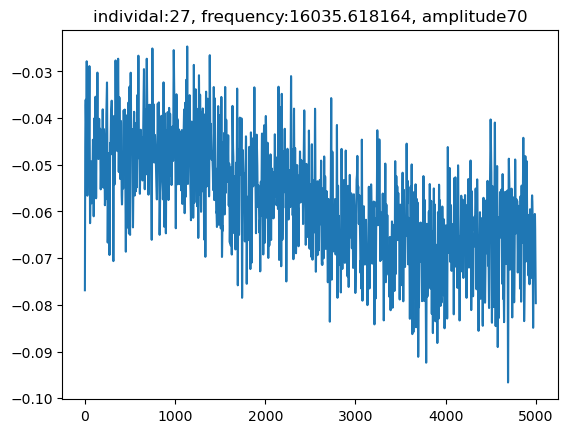

peak distance relative to baseline=-0.047751328138450296, peak coloured at timestamp 4692.0
reading individual 28


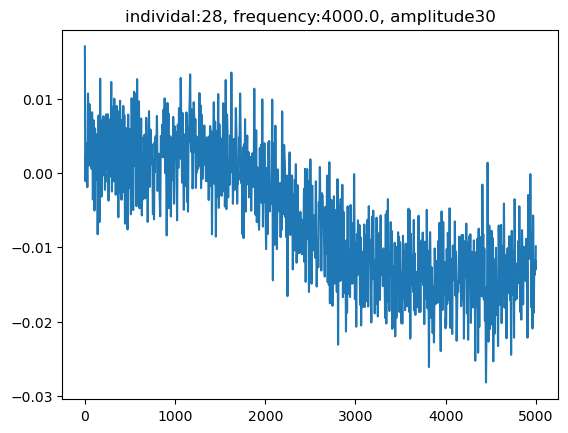

peak distance relative to baseline=-0.03036095959447312, peak coloured at timestamp 4448.0
reading individual 29


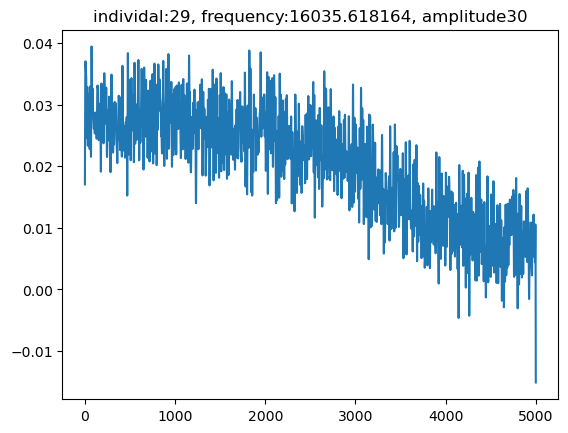

peak distance relative to baseline=-0.04232991817529973, peak coloured at timestamp 5000.0
reading individual 30


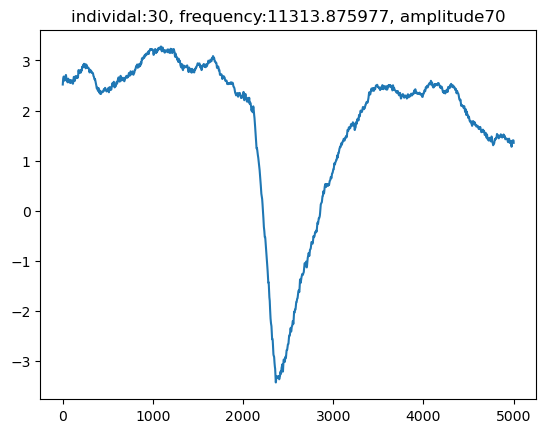

peak distance relative to baseline=-6.226316144953377, peak coloured at timestamp 2363.0
reading individual 31


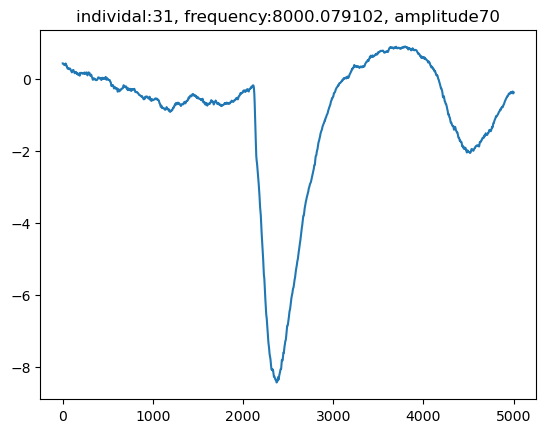

peak distance relative to baseline=-8.05268883044426, peak coloured at timestamp 2372.0
reading individual 32


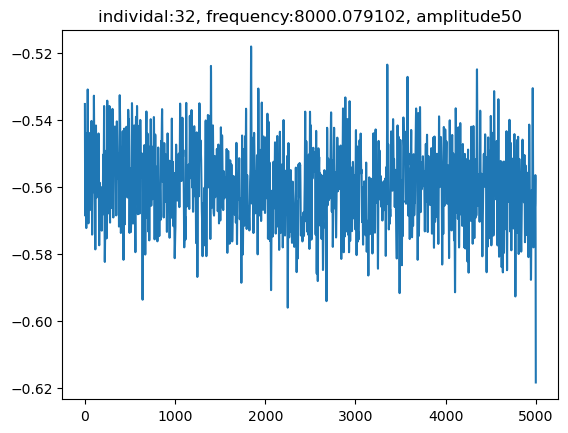

peak distance relative to baseline=-0.06066032056961279, peak coloured at timestamp 5000.0
reading individual 33


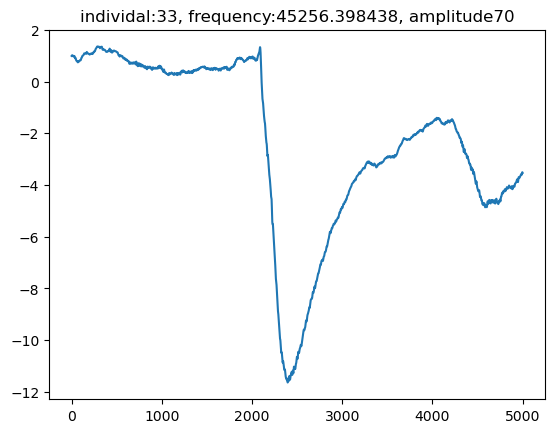

peak distance relative to baseline=-12.34250364811506, peak coloured at timestamp 2395.0
reading individual 34


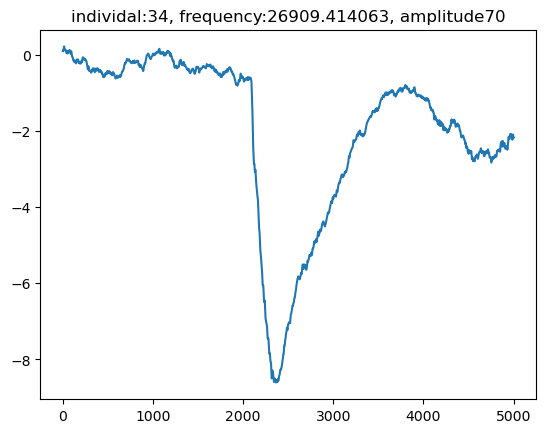

peak distance relative to baseline=-8.311687208114241, peak coloured at timestamp 2364.0
reading individual 35


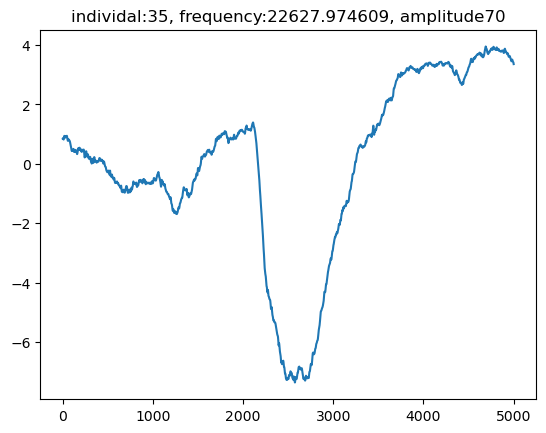

peak distance relative to baseline=-7.218105885651314, peak coloured at timestamp 2574.0
reading individual 36


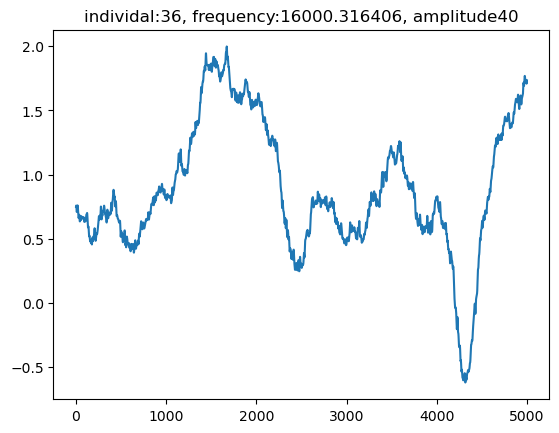

peak distance relative to baseline=-1.6857601660524786, peak coloured at timestamp 4317.0
reading individual 37


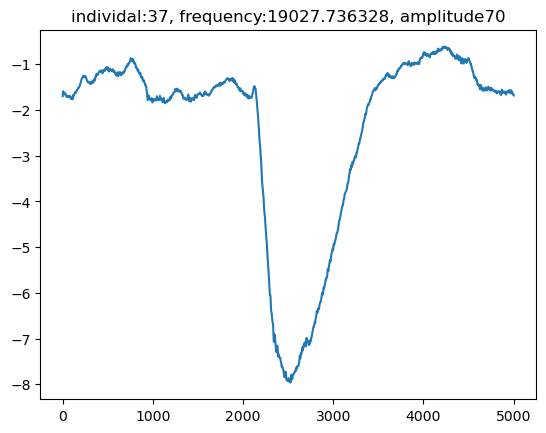

peak distance relative to baseline=-6.495089594874721, peak coloured at timestamp 2526.0
reading individual 38


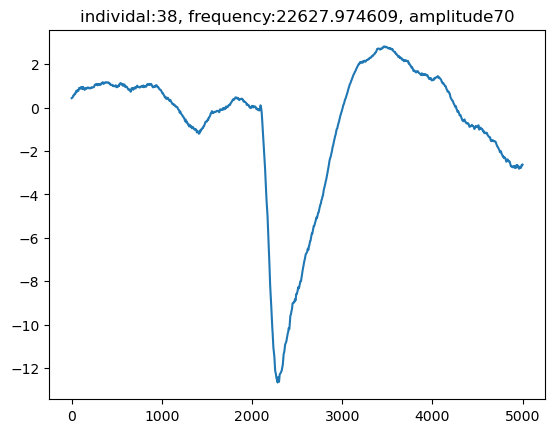

peak distance relative to baseline=-13.067316246212279, peak coloured at timestamp 2283.0
reading individual 39


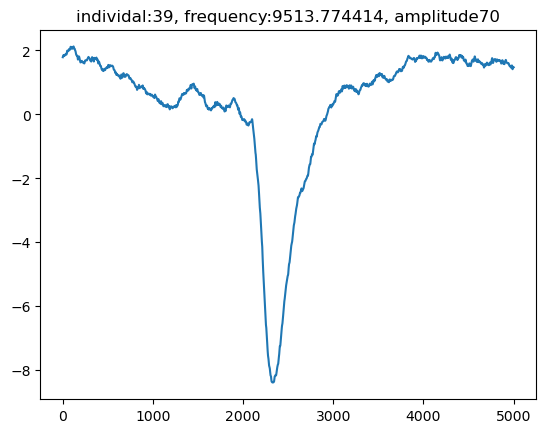

peak distance relative to baseline=-9.28083916761286, peak coloured at timestamp 2335.0
reading individual 40


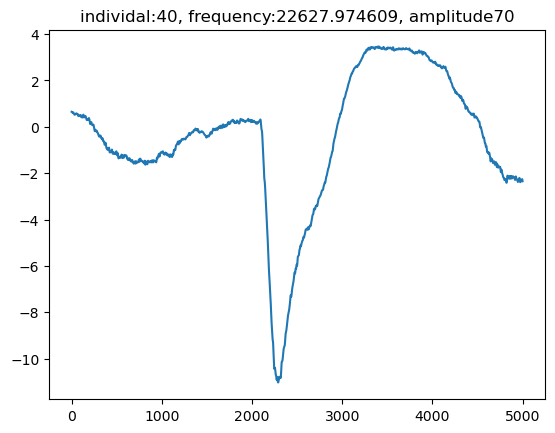

peak distance relative to baseline=-10.500680541858618, peak coloured at timestamp 2290.0
reading individual 41


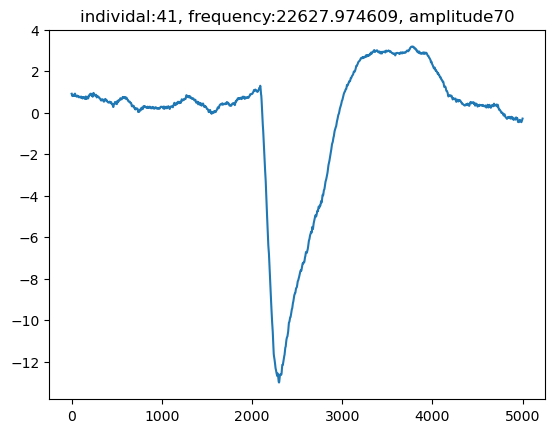

peak distance relative to baseline=-13.498871042007579, peak coloured at timestamp 2299.0
reading individual 42


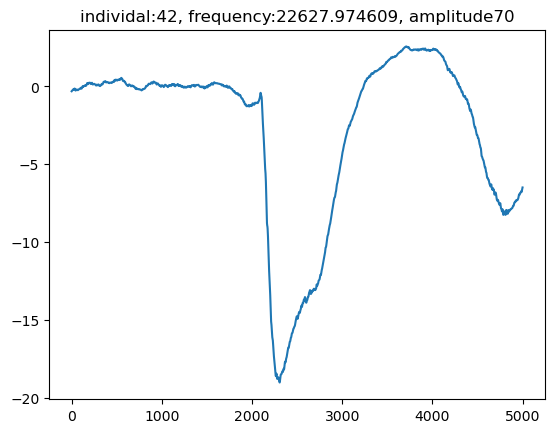

peak distance relative to baseline=-19.0065089479742, peak coloured at timestamp 2306.0
reading individual 43


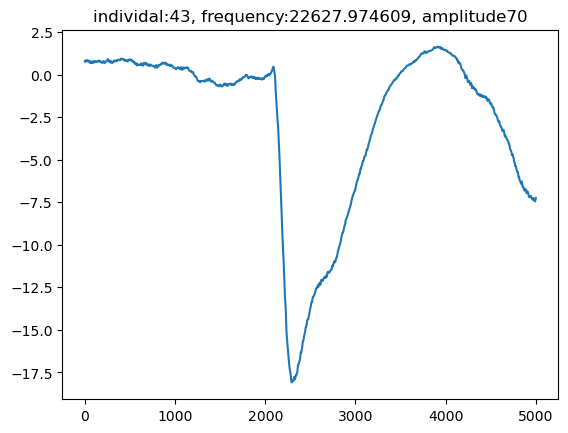

peak distance relative to baseline=-18.325673039134987, peak coloured at timestamp 2294.0
reading individual 44


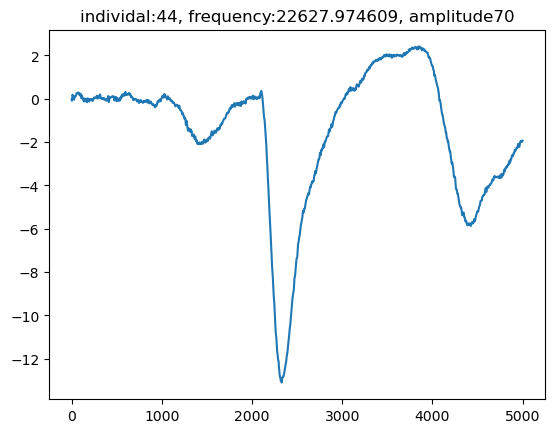

peak distance relative to baseline=-12.66459093202687, peak coloured at timestamp 2329.0
reading individual 45


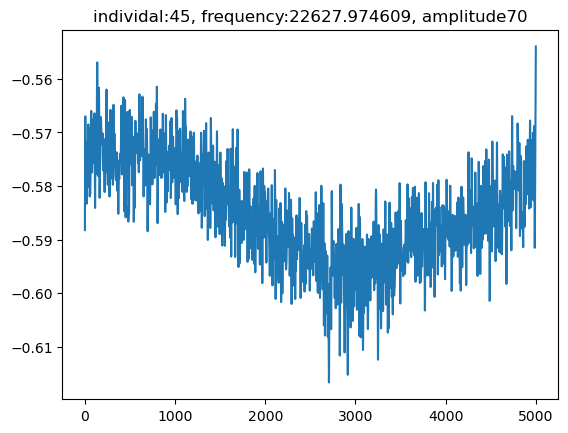

peak distance relative to baseline=-0.03907836835391487, peak coloured at timestamp 2706.0
reading individual 46


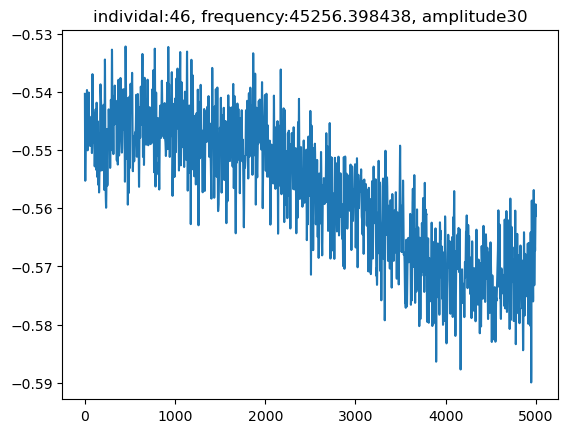

peak distance relative to baseline=-0.04296622037635023, peak coloured at timestamp 4949.0
reading individual 47


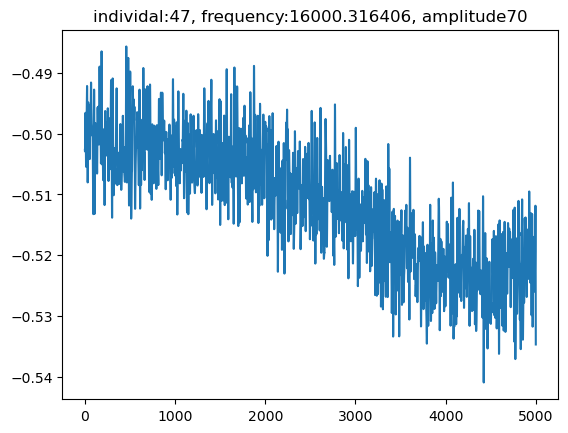

peak distance relative to baseline=-0.0382809175776766, peak coloured at timestamp 4423.0
reading individual 48


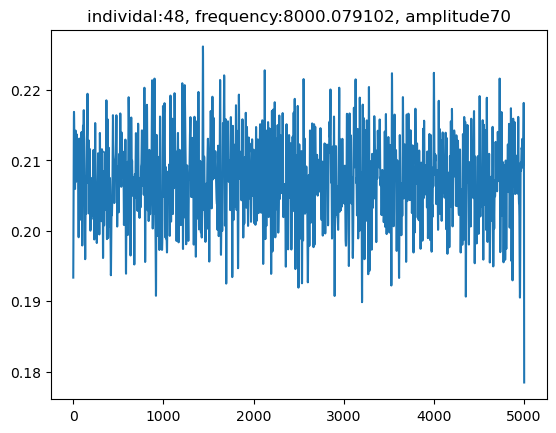

peak distance relative to baseline=-0.028959580197465445, peak coloured at timestamp 5000.0
reading individual 49


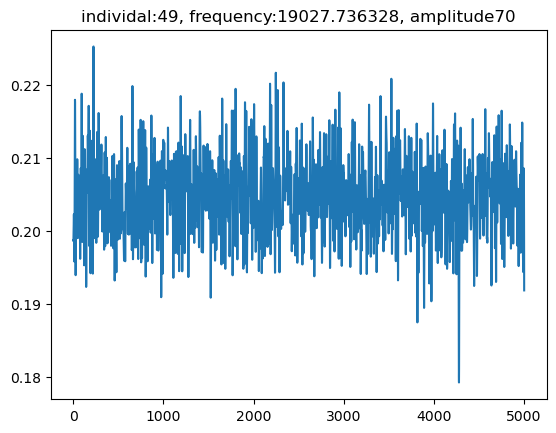

individual 49 not found


([[-10.117367934364182, 2784.0],
  [-11.814782058103633, 2689.0],
  [-0.8671212744582848, 2431.0],
  [-0.7370127159443702, 2304.0],
  [-8.435037415691607, 2262.0],
  [-5.877432151392222, 2296.0],
  [-5.543861581135253, 2283.0],
  [-7.208327923505179, 2266.0],
  [-7.952704621590036, 2243.0],
  [-4.590651017750688, 2301.0],
  [-6.1463377816522184, 2234.0],
  [-5.065247993494664, 2228.0],
  [-2.9842767677587623, 2917.0],
  [-3.334724322285753, 2261.0],
  [-3.508349680455602, 2211.0],
  [-1.29705251207888, 2175.0],
  [-0.14058503355645047, 2045.0],
  [-0.13880330203907398, 2044.0],
  [-0.03488193683306928, 4233.0],
  [-12.34250364811506, 2395.0],
  [-8.311687208114241, 2364.0],
  [-7.218105885651314, 2574.0],
  [-1.6857601660524786, 4317.0],
  [-6.495089594874721, 2526.0],
  [-13.067316246212279, 2283.0],
  [-9.28083916761286, 2335.0],
  [-10.500680541858618, 2290.0],
  [-13.498871042007579, 2299.0],
  [-19.0065089479742, 2306.0],
  [-18.325673039134987, 2294.0],
  [-12.66459093202687, 232

In [49]:
run_all(PATH)


In [9]:

calc_baseline=lambda trail_data: np.mean(trail_data[:2000])
calc_delta=lambda trail_data: np.min(trail_data[2000:])-calc_baseline(trail_data)
calc_delta_timestep=lambda trail_data: np.argmin(trail_data[2000:])+2000
def show_signals_data(lfp_data):
    plt.figure(figsize=(15,15))
    counter=1
    for i in range(lfp_data.shape[0]):
        for j in range(lfp_data.shape[1]):
            plt.subplot(8,3,counter)
            trail_data=np.mean(lfp_data[i][j],axis=1)
            plt.plot(trail_data)
            counter+=1
    plt.tight_layout()
    plt.show()
def plot_single(lfp_data,i,j):
    plt.plot(np.mean(lfp_data[i][j],axis=1))

def get_highest_magnitude_relative_to_baseline(lfp_data):
    deltas=np.zeros((lfp_data.shape[0],lfp_data.shape[1]))
    times_to_peak=np.zeros((lfp_data.shape[0],lfp_data.shape[1]))
    for i in range(lfp_data.shape[0]):
        for j in range(lfp_data.shape[1]):
            trail_data=np.mean(lfp_data[i][j],axis=1)
            deltas[i][j]=calc_delta(trail_data)
            times_to_peak[i][j]=calc_delta_timestep(trail_data)
    a=np.argmin(deltas)
    print(deltas    )
    print(times_to_peak)
    i=a//lfp_data.shape[1]
    j=a-(lfp_data.shape[1]*i)
    plot_single(lfp_data,i,j)
    print(times_to_peak[i][j])
    return deltas


In [ ]:
show_signals_data(lfp_data)

[[-1.28842517 -0.80515739 -0.49924505]
 [-0.92794841 -1.33691021 -0.63848728]
 [-1.0928513  -1.95468239 -3.24155043]
 [-1.11004573 -0.5325525  -2.88403604]
 [-1.7341443  -2.07327588 -5.05206656]
 [-0.36356803 -4.13591397 -5.54386158]
 [-0.83429005 -2.95996818 -5.03722932]
 [-0.53769456 -0.6953893  -4.73716299]]
[[4189. 4319. 3571.]
 [3946. 3732. 2494.]
 [2000. 2669. 2697.]
 [4362. 2528. 2387.]
 [2637. 2286. 2349.]
 [2856. 2296. 2283.]
 [4186. 2296. 2259.]
 [2722. 3725. 2715.]]
2283.0


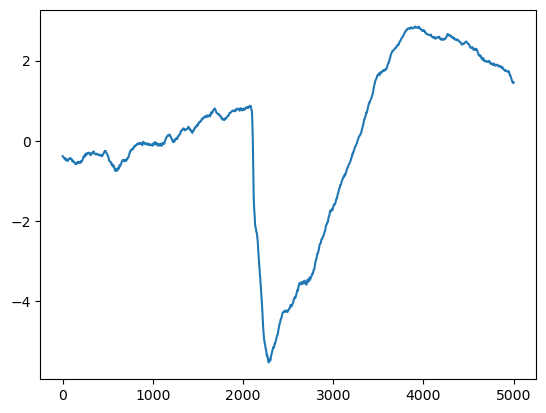

In [10]:

deltas=get_highest_magnitude_relative_to_baseline(lfp_data)

In [87]:
deltas

array([[1.49142041, 1.47420576, 1.58934781],
       [0.99350167, 1.1937834 , 1.54918886],
       [1.97289733, 2.09021875, 4.39441628],
       [0.85818472, 2.09783923, 4.26581166],
       [2.57188301, 2.82057831, 6.82660529],
       [1.59720077, 6.25960495, 8.37494056],
       [1.38217419, 4.56659263, 7.71078091],
       [0.77477819, 1.85286962, 6.60045174]])